# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('newkoss.csv')

In [3]:
df.head()

,No,Nama Kos,Kamar mandi,Kasur,Lemari baju,AC,Parkiran,Wifi,Harga,Jarak,patokan,alamat,Luas Kamar
0,1.0,Kost Rumah Regal Tipe A Pondok Aren Tangerang ...,1.0,1.0,1.0,1.0,motor,1.0,1250000.0,dekat,STAN,Pondok aren,5.0
1,2.0,Kost Rumah Regal Tipe A Pondok Aren Tangerang ...,1.0,1.0,1.0,1.0,motor,1.0,1450000.0,dekat,STAN,Kecamatan pondok aren,7.0
2,3.0,Kost Rumah Regal Tipe A Pondok Aren Tangerang ...,1.0,1.0,1.0,1.0,motor,1.0,1000000.0,dekat,STAN,Kecamatan pondok aren,5.0
3,4.0,Kost Apik Alhijra Tipe E Perkici Bintaro Jaya ...,0.0,2.0,2.0,2.0,motor,1.0,970000.0,sedang,STAN,Kecamatan Ciputat Timur,5.0
4,5.0,Kost Apik Alhijra Tipe E Perkici Bintaro Jaya ...,1.0,1.0,1.0,1.0,motor,1.0,1825000.0,sedang,STAN,Kecamatan Ciputat Timur,9.0


### Kolom yang akan digunakan dalam melakukan prediksi ini adalah:
1. Kamar mandi
2. Kasur
3. Lemari baju
4. AC
5. Luas kamar
6. Harga

In [5]:
df = pd.read_csv('newkoss.csv', usecols=['Kamar mandi', 'Kasur', 'Lemari baju', 'AC', 'Harga','Luas Kamar'])

In [6]:
df.shape

(105, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kamar mandi  100 non-null    float64
 1   Kasur        100 non-null    float64
 2   Lemari baju  100 non-null    float64
 3   AC           100 non-null    float64
 4   Harga        100 non-null    float64
 5   Luas Kamar   100 non-null    float64
dtypes: float64(6)
memory usage: 5.0 KB


In [8]:
df = df.fillna(0)

### Mengubah data float menjadi int 

In [9]:
df['Kasur'] = df['Kasur'].astype('int')
df['Lemari baju'] = df['Lemari baju'].astype('int')
df['AC'] = df['AC'].astype('int')
df['Kamar mandi'] = df['Kamar mandi'].astype('int')
df['Harga'] = df['Harga'].astype('int')
df['Luas Kamar'] = df['Luas Kamar'].astype('int')

In [10]:
df.shape

(105, 6)

In [11]:
df.describe()

,Kamar mandi,Kasur,Lemari baju,AC,Harga,Luas Kamar
count,105.000000,105.000000,105.000000,105.000000,1.050000e+02,105.000000
mean,0.638095,1.038095,1.000000,1.171429,1.699924e+06,7.104762
std,0.482856,0.364897,0.310087,0.489449,1.842649e+06,2.303525
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,1.000000,1.000000,1.000000,9.700000e+05,6.000000
50%,1.000000,1.000000,1.000000,1.000000,1.500000e+06,7.000000
75%,1.000000,1.000000,1.000000,1.000000,1.800000e+06,9.000000
max,1.000000,2.000000,2.000000,2.000000,1.800000e+07,10.000000


In [ ]:
# Mencari dan menangani missing values
df.isnull().sum()

#### Ternyata data kita tidak ada missing values

C:\Users\icoek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


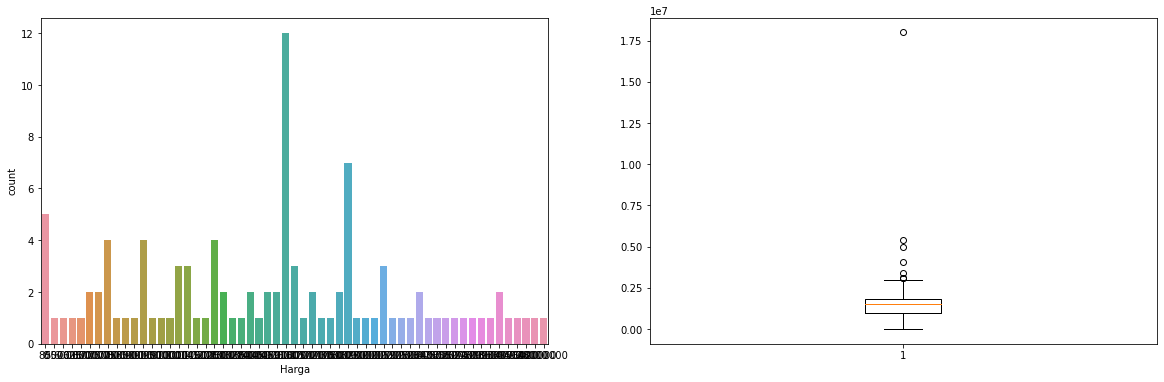

In [13]:
#Univariate analysis harga
#Melihat distribusi dari harga
f = plt.figure(figsize=(20,6))

f.add_subplot(1,2,1)
sns.countplot(df['Harga'])

f.add_subplot(1,2,2)
plt.boxplot(df['Harga'])
plt.show()

C:\Users\icoek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


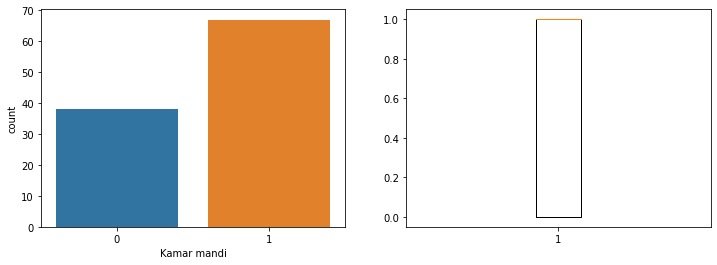

In [14]:
#Univariate analysis kamar mandi
#Melihat distribusi dari kamar mandi
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['Kamar mandi'])

f.add_subplot(1,2,2)
plt.boxplot(df['Kamar mandi'])
plt.show()

C:\Users\icoek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


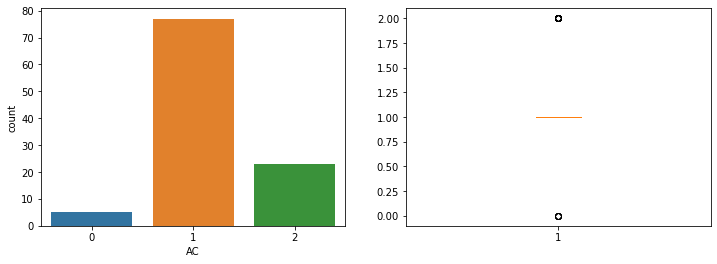

In [15]:
#Univariate analysis AC
#Melihat distribusi dari AC
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['AC'])

f.add_subplot(1,2,2)
plt.boxplot(df['AC'])
plt.show()

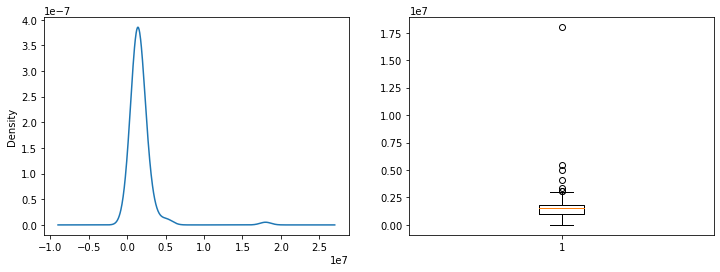

In [16]:
#Univariate analysis harga
#Melihat distribusi dari harga
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['Harga'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['Harga'])
plt.show()

C:\Users\icoek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


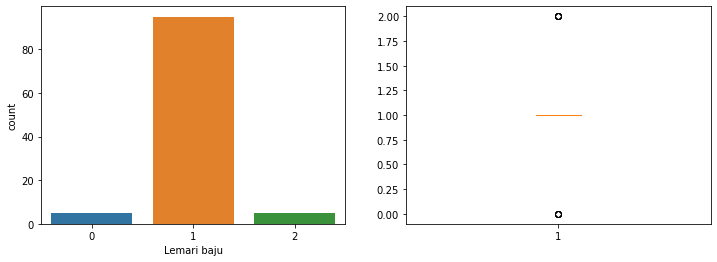

In [17]:
#Univariate analysis lemari
#Melihat distribusi dari lemari
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['Lemari baju'])

f.add_subplot(1,2,2)
plt.boxplot(df['Lemari baju'])
plt.show()

C:\Users\icoek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


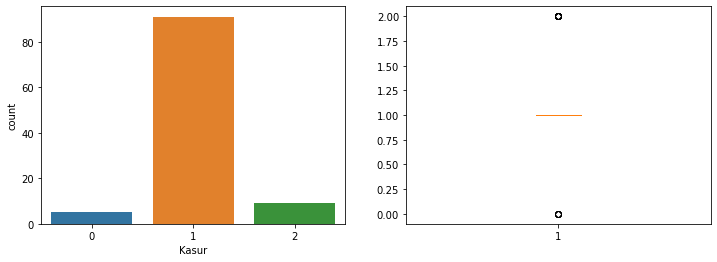

In [18]:
#Univariate analysis kasur
#Melihat distribusi dari kasur
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['Kasur'])

f.add_subplot(1,2,2)
plt.boxplot(df['Kasur'])
plt.show()

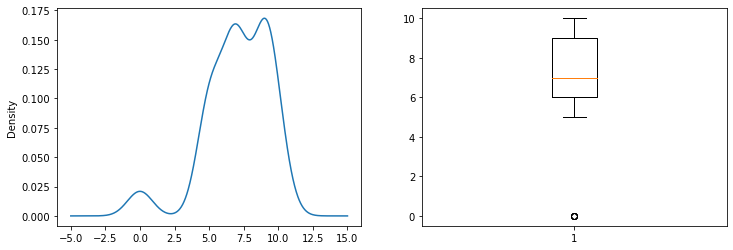

In [19]:
#Univariate analysis harga
#Melihat distribusi dari harga
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['Luas Kamar'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['Luas Kamar'])
plt.show()

C:\Users\icoek\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

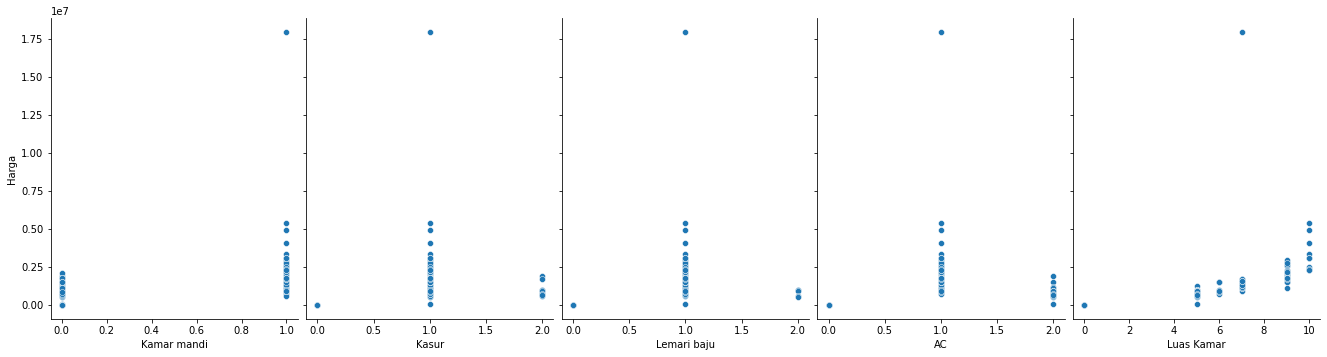

In [21]:
#Bivariate analysis antara independent variable dan dependent variable
#Melihat hubungan antara independent dan dependent
#Menggunakan pairplot
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['Kamar mandi', 'Kasur', 'Lemari baju', 'AC', 'Luas Kamar'], y_vars=['Harga'], size=5, aspect=0.75)
plt.show()

In [22]:
#Mengetahui nilai korelasi dari independent variable dan dependent variable
df.corr().style.background_gradient().set_precision(2)

,Kamar mandi,Kasur,Lemari baju,AC,Harga,Luas Kamar
Kamar mandi,1.00,0.08,0.13,-0.18,0.30,0.48
Kasur,0.08,1.00,0.76,0.66,0.04,0.26
Lemari baju,0.13,0.76,1.00,0.63,0.07,0.34
AC,-0.18,0.66,0.63,1.00,-0.12,-0.01
Harga,0.30,0.04,0.07,-0.12,1.00,0.38
Luas Kamar,0.48,0.26,0.34,-0.01,0.38,1.00


# Modelling Data

In [23]:
#Membuat variabel x dan y
x = df.drop(columns='Harga')
y = df['Harga']

In [24]:
#Kemudian, split data menjadi training and testing dengan porsi 70:30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

In [25]:
#Cek shape dari data training dan testing
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(73, 5)
(73,)
(32, 5)
(32,)


In [26]:
#Membuat object linear regresi
lin_reg = LinearRegression()

In [27]:
df.head()

,Kamar mandi,Kasur,Lemari baju,AC,Harga,Luas Kamar
0,1,1,1,1,1250000,5
1,1,1,1,1,1450000,7
2,1,1,1,1,1000000,5
3,0,2,2,2,970000,5
4,1,1,1,1,1825000,9


In [28]:
#Train the model menggunakan training data yang sudah displit
lin_reg.fit(x_train, y_train)

LinearRegression()

In [29]:
#Cari tau nilai slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[ 192923.91915428   10192.63471716 -145590.41274479 -186139.35779355
  305403.73505862]
-375188.61092256824


In [30]:
#Mencoba membuat dataframe agar terlihat lebih rapih
coef_dict = {
    'features': x.columns,
    'coef_value':lin_reg.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features', 'coef_value'])
coef

,features,coef_value
0,Kamar mandi,192923.919154
1,Kasur,10192.634717
2,Lemari baju,-145590.412745
3,AC,-186139.357794
4,Luas Kamar,305403.735059


In [31]:
y_pred = lin_reg.predict(x_test)

In [32]:
#Mencari tahu accuracy score dari modelling data dengan menggunakan testing data
lin_reg.score(x_test, y_test)

0.04205375965196101

# Prediction

### Kita akan memprediksi harga kost dengan kriteria:
1. Memiliki Kamar Mandi di Dalam
2. Memiliki Kasur
3. Memiliki Lemari Baju
4. Memakai AC
5. Luas Kamar 6 Meter

In [34]:
lin_reg.predict([[1,1,1,1,6]])

array([1328620.58276227])

### Dan ternyata jika kita ingin mendapatkan semua kriteria yang kita inginkan, maka prediksi harga untuk kost di Jakarta adalah Rp1.328.620 

In [35]:
lin_reg.predict([[1,0,0,1,12]])

array([3296440.77114164])

In [36]:
lin_reg.predict([[0,0,0,1,12]])

array([3103516.85198736])